<a href="https://colab.research.google.com/github/gilangnugraha1/UAS-AI./blob/main/Klasifikasi_Obesitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Klasifikasi Obesitas menggunakan KNN
Dibuat oleh :Gilang Nugraha

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving Obesity Classification.csv to Obesity Classification.csv


In [5]:
# Assuming the file name is 'Obesity Classification.csv'
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)


In [6]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese


In [7]:
# Check for duplicate rows
duplicates = data.duplicated()
num_duplicates = duplicates.sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


In [8]:
# Remove duplicate rows if any
if num_duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicate rows removed.")


In [9]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Missing values per column:
ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64


In [10]:
# Impute missing values

In [11]:
# Here we use mean/mode imputation for numerical/categorical columns
for column in data.columns:
    if data[column].dtype in ['float64', 'int64']:
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)
print("\nMissing values imputed.")


Missing values imputed.


<ipython-input-11-c1696c3c9711>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
<ipython-input-11-c1696c3c9711>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [12]:
# Summary statistics
print("\nSummary statistics:")
print(data.describe())



Summary statistics:
               ID         Age      Height      Weight         BMI
count  108.000000  108.000000  108.000000  108.000000  108.000000
mean    56.046296   46.555556  166.574074   59.490741   20.549074
std     31.917939   24.720620   27.873615   28.856233    7.583818
min      1.000000   11.000000  120.000000   10.000000    3.900000
25%     28.750000   27.000000  140.000000   35.000000   16.700000
50%     56.500000   42.500000  175.000000   55.000000   21.200000
75%     83.250000   59.250000  190.000000   85.000000   26.100000
max    110.000000  112.000000  210.000000  120.000000   37.200000


In [13]:
# EDA (Exploratory Data Analysis)
print("\nExploratory Data Analysis (EDA):")


Exploratory Data Analysis (EDA):


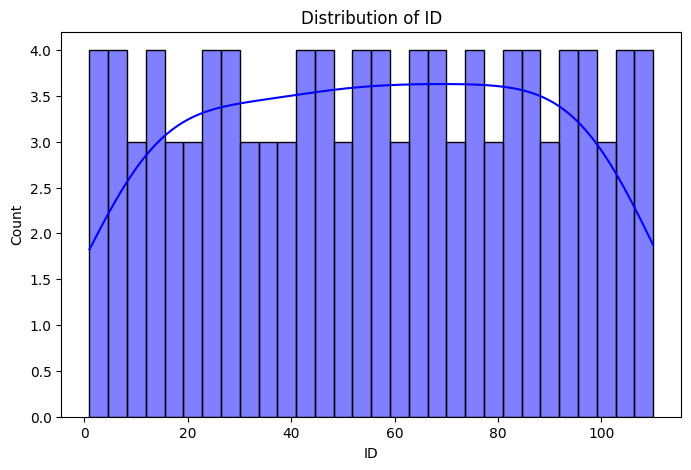

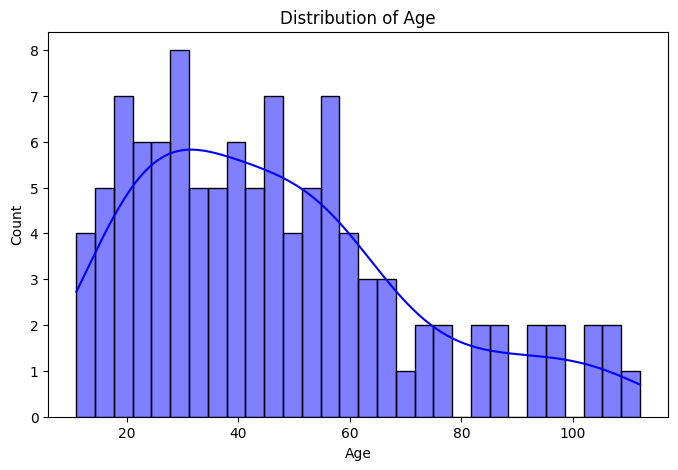

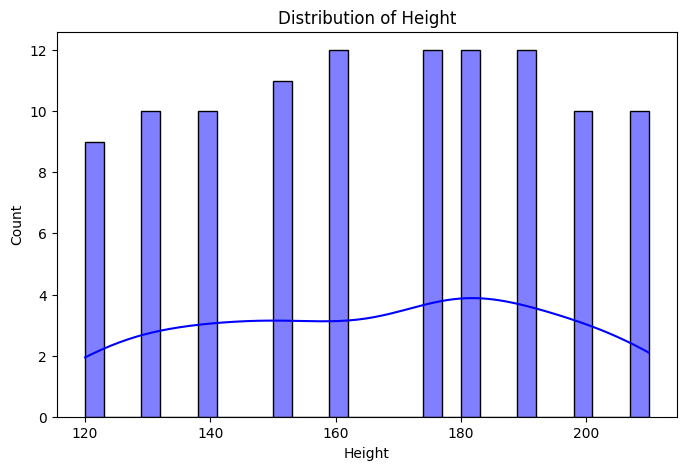

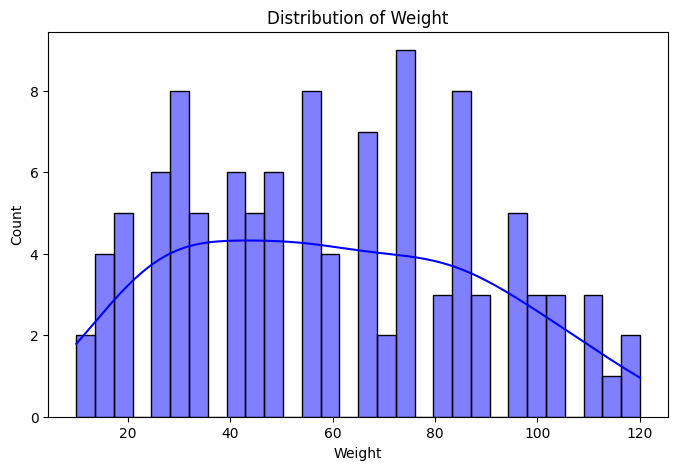

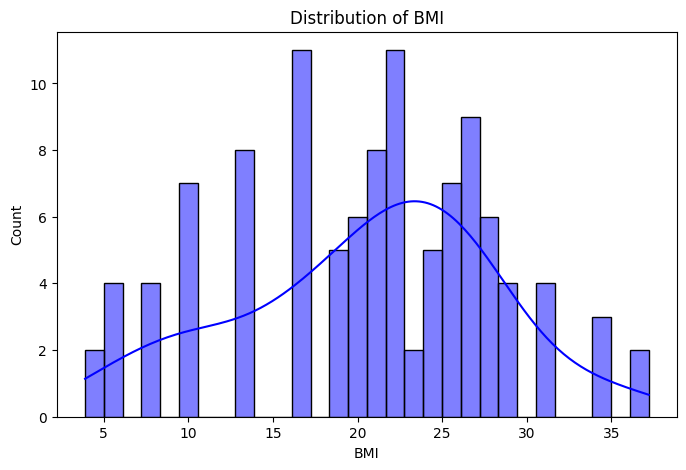

In [14]:
# Plot the distribution of numerical features
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

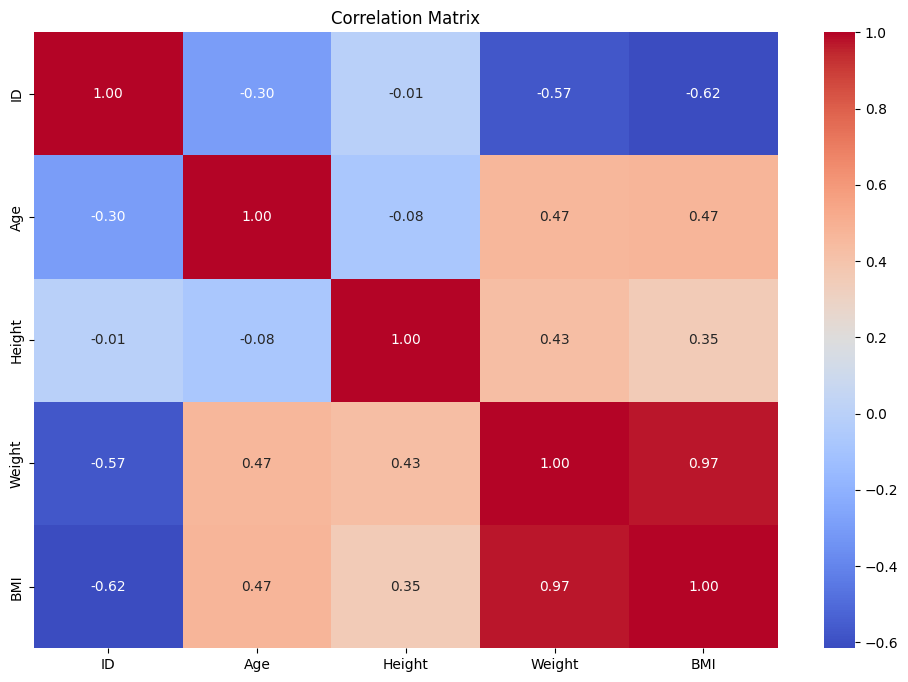

In [18]:
# Plot correlations
if not data.select_dtypes(include=['float64', 'int64']).empty:
    plt.figure(figsize=(12, 8))
    correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()
else:
    print("No numerical columns available for correlation matrix.")

<ipython-input-19-938d5c25b3be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='viridis')


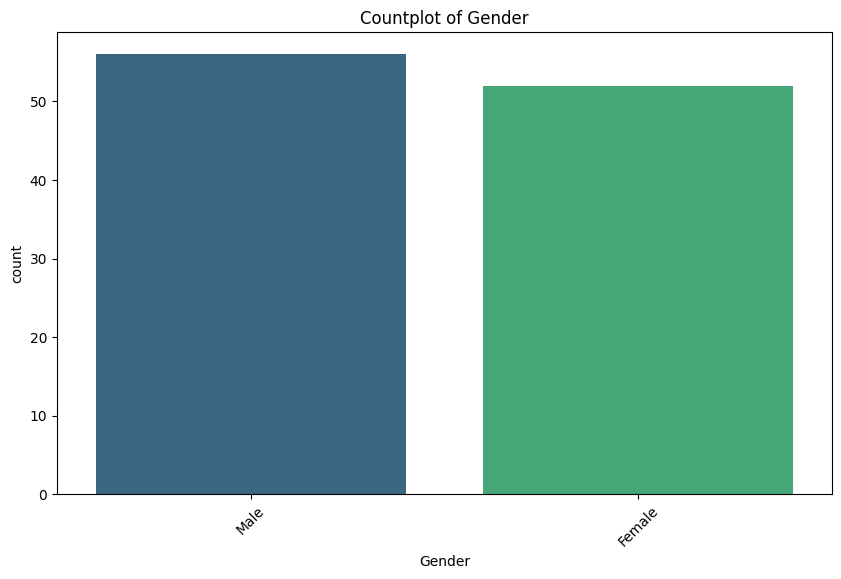

<ipython-input-19-938d5c25b3be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='viridis')


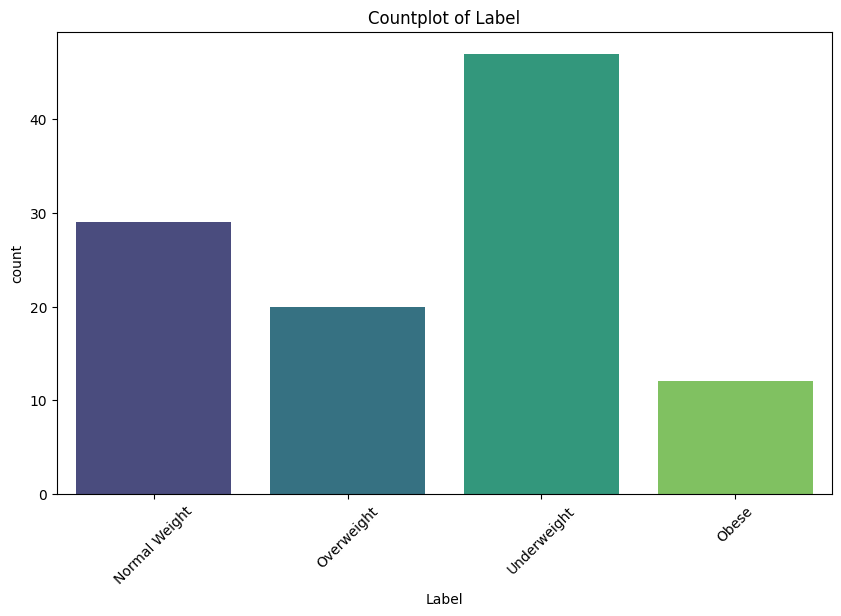

In [19]:
# Countplot for categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    if data[col].nunique() <= 20:  # Limit to 20 unique values for better visualization
        sns.countplot(x=data[col], palette='viridis')
        plt.title(f"Countplot of {col}")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Skipping countplot for {col} as it has more than 20 unique values.")

In [20]:
# Save the cleaned dataset
cleaned_file_path = '/content/Obesity_Classification_Cleaned.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}")


Cleaned dataset saved to /content/Obesity_Classification_Cleaned.csv
